<a href="https://colab.research.google.com/github/YoloA11000/Metodos-Numericos/blob/main/Polinomio_de_Lagrange_con_sympy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polinomio de Lagrange con sympy

El problema de determinar un polinomio de grado uno que pasa por diferentes puntos $(x_{0}, y_{0})$  y  $(x_{1}, y_{1})$  es igual al de aproximar una función $ f $ para la que $f(x_{0} = y_{0})$ y $f(x_{1} = y_{1})$ por medio
de un polinomio de primer grado que se interpola, o que coincida con los valores de $f$ en
los puntos determinados. El uso de estos polinomios para aproximación dentro del intervalo determinado dentro de los puntos finales recibe el nombre de **interpolación**.

Defina las funciones:
$$
L_{0}(x) = \frac{x - x_{1}}{x_{0} - x_{1}}  \quad \text{y} \quad  L_{1}(x) = \frac{x - x_{0}}{x_{1} - x_{0}}
$$
El polinomio de interpolación de Lagrange lineal a través de $(x_{0}, y_{0})$ y $(x_{1}, y_{1})$ es
$$
P_{x} = L_{0}(x)f(x_{0}) + L_{1}(x)f(x_{1}) = \frac{x - x_{1}}{x_{0} - x_{1}}f(x_{0}) + \frac{x - x_{0}}{x_{1} - x_{0}}f(x_{1})
$$
Observe que
$$
L_{0}(x_{0}) = 1,\quad L_{0}(x_{1}) = 0,\quad L_{1}(x_{0}) = 0,\quad L_{1}(x_{1}) = 1
$$
Lo cual implica que
$$
P(x_{0}) = 1 ‧ f(x_{0}) + 0  ‧ f(x_{1}) = f(x_{0}) = y_{0}
$$
y
$$
P(x_{1}) = 0 ‧ f(x_{0}) + 1  ‧ f(x_{1}) = f(x_{1}) = y_{1}
$$
Por lo que $P$ es el único polinomio de grado a lo más 1 que pasa por $(x_{0}, y_{0})$ y $(x_{1}, y_{1})$

Polinomio de Lagrange  P_{x} = 6 - x


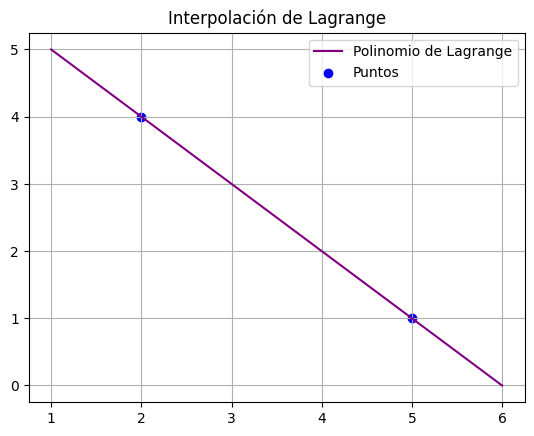

In [16]:
# Importamos las librerías necesarias
import sympy as sp  # Para cálculo simbólico (crear y manipular expresiones matemáticas)
import matplotlib.pyplot as plt  # Para graficar
import numpy as np  # Para trabajar con arreglos numéricos y funciones matemáticas

def lagrange_interpolation(points):
    """
    Calcula el polinomio de interpolación de Lagrange para un conjunto de puntos dados.

    Parámetros:
        points (list of tuples): Lista de pares (x, y)

    Retorna:
        polynomial (sympy expression): Polinomio de Lagrange como una expresión simbólica
    """
    x = sp.Symbol('x')  # Definimos la variable simbólica x
    n = len(points)  # Número de puntos
    polynomial = 0  # Inicializamos el polinomio

    # Recorremos todos los puntos para construir cada término L_i(x)
    for i in range(n):
        xi, yi = points[i]  # Obtenemos las coordenadas del punto i
        Li = 1  # Inicializamos L_i(x) como 1

        # Construimos el producto para L_i(x)
        for j in range(n):
            if i != j:  # No usamos el mismo punto dos veces
                xj, _ = points[j]
                Li *= (x - xj) / (xi - xj)  # Parte del producto de L_i(x)

        polynomial += yi * Li  # Sumamos y_i * L_i(x) al polinomio total

    polynomial = sp.simplify(polynomial)  # Simplificamos la expresión resultante
    return polynomial  # Retornamos el polinomio final

def plot_lagrange(polynomial, points):
    """
    Grafica el polinomio de Lagrange junto con los puntos originales.

    Parámetros:
        polynomial (sympy expression): Polinomio simbólico de Lagrange
        points (list of tuples): Lista de pares (x, y)
    """
    x = sp.Symbol('x')
    # Convertimos la expresión simbólica a una función evaluable con NumPy
    f_lambdified = sp.lambdify(x, polynomial, 'numpy')

    # Creamos un rango de valores x para graficar el polinomio
    x_vals = np.linspace(min(p[0] for p in points) - 1,
                         max(p[0] for p in points) + 1, 400)
    # Evaluamos el polinomio en cada valor de x
    y_vals = f_lambdified(x_vals)

    # Graficamos el polinomio como línea azul
    plt.plot(x_vals, y_vals, label='Polinomio de Lagrange', color='purple')

    # Extraemos las coordenadas de los puntos para graficarlos
    px, py = zip(*points)
    plt.scatter(px, py, color='red', label='Puntos')  # Puntos originales en rojo

    # Agregamos título, leyenda y cuadrícula
    plt.title('Interpolación de Lagrange')
    plt.legend()
    plt.grid(True)
    plt.show()  # Mostramos la gráfica

# -----------------------
# Ejemplo de uso
# -----------------------
puntos = [(2, 4), (5, 1)]  # Lista de puntos a interpolar
polinomio = lagrange_interpolation(puntos)  # Calculamos el polinomio
print("Polinomio de Lagrange  P_{x} = " + str(polinomio))  # Imprimimos el polinomio
plot_lagrange(polinomio, puntos)  # Graficamos el polinomio y los puntos